# ***Importation et nettoyage***


In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
data = pd.read_csv("vispremv.dat",sep=" ")
data.head()

SEXEQ FAMIQ PCSPQ kvunbq vienbq uemnbq xlgnbq ylvnbq rocnbq nptagq endetq gagetq facanq lgagtq havefq jnbjdq ageq relatq qsmoyq opgnbq moyrvq tavepq dmvtpq boppnq itavcq  RELAT  AGER    OPGNBL    MOYRVL     TAVEPL    ENDETL     GAGETL    GAGECL     GAGEML  KVUNB  QSMOY    QCREDL    DMVTPL    BOPPNL     FACANL  LGAGTL  VIENB     VIEMTL  UEMNB  XLGNB     XLGMTL  YLVNB     YLVMTL  ROCNB  NPTAG     ITAVCL     HAVEFL    JNBJDL CARVP
148009  Shom  Fcou  Pint     K1     V1     U2     X2     Y2     R1     N0     E1     G1     F1     L0     H1     J1   A2     R2     Q2     O0     M2     T2     D0     B2     I2    238    51  0.000000  4.753590  13.461603  1.609438  11.688701   0.00000  11.688701      2  35938  4.744932  2.484907  3.912023  12.235714     0.0      1  11.935123      4      2  13.161865      2  12.110635     14      0  14.080718  13.230263  0.693147  Coui
552427  Shom  Fcou  Pint     K0     V0     U1     X0     Y1     R0     N0     E0     G0     F1     L0     H0     J0   A2     R1     Q0     O0     M2     T1     D1     B0     I2    139    58  0.000000  3.713572   8.132413  0.000000   0.000000   0.00000   0.000000      1   1336  3.713572  2.708050  1.098612   8.130059     0.0      0   0.000000      1      0   0.000000      1   8.132413      0      0  11.717872   0.000000  0.000000  Coui
556005  Shom  Fseu  Psan     K0     V0     U2     X1     Y2     R1     N0     E0     G0     F0     L0     H0     J0   A0     R1     Q2     O0     M1     T2     D0     B1     I2     99    27  0.000000  2.890372  11.242717  0.000000   0.000000   0.00000   0.000000      1  12221  2.890372  2.484907  3.178054   0.000000     0.0      0   0.000000      3      1  10.743178      2  10.309286     14      0  11.329303   0.000000  0.000000  Coui
556686  Shom  Fseu  Pouv     K0     V1     U2     X2     Y2     R1     N1     E0     G1     F0     L0     H1     J1   A1     R1     Q2     O0     M2     T2     D0     B2     I2     89    49  0.000000  5.926926  13.067592  0.000000  12.250391  10.54165  12.050611      1  21187  5.342334  2.484907  3.912023   0.000000     0.0      1   9.972267      5      3  12.899220      2  11.203025     11      1  13.111856   9.972267  2.772589  Coui
642680  Shom  Fcou  Pint     K0     V0     U2     X1     Y2     R1     N0     E0     G0     F0     L0     H0     J1   A2     R2     Q1     O2     M2     T2     D0     B2     I2    216    64  1.791759  3.218876  11.270382  0.000000   0.000000   0.00000   0.000000      1   7154  3.218876  2.484907  4.219508   0.000000     0.0      0   0.000000      4      1  10.457976      2   9.190546     27      0  11.304904   0.000000  1.386294  Coui

In [ ]:
#suppression des variables de type "quantile" identifiés avec leur nom finissant par q
data = data.loc[:, ~data.columns.str.endswith('q')]
data.head()

SEXEQ FAMIQ PCSPQ  RELAT  AGER    OPGNBL    MOYRVL     TAVEPL    ENDETL     GAGETL    GAGECL     GAGEML  KVUNB  QSMOY    QCREDL    DMVTPL    BOPPNL     FACANL  LGAGTL  VIENB     VIEMTL  UEMNB  XLGNB     XLGMTL  YLVNB     YLVMTL  ROCNB  NPTAG     ITAVCL     HAVEFL    JNBJDL CARVP
148009  Shom  Fcou  Pint    238    51  0.000000  4.753590  13.461603  1.609438  11.688701   0.00000  11.688701      2  35938  4.744932  2.484907  3.912023  12.235714     0.0      1  11.935123      4      2  13.161865      2  12.110635     14      0  14.080718  13.230263  0.693147  Coui
552427  Shom  Fcou  Pint    139    58  0.000000  3.713572   8.132413  0.000000   0.000000   0.00000   0.000000      1   1336  3.713572  2.708050  1.098612   8.130059     0.0      0   0.000000      1      0   0.000000      1   8.132413      0      0  11.717872   0.000000  0.000000  Coui
556005  Shom  Fseu  Psan     99    27  0.000000  2.890372  11.242717  0.000000   0.000000   0.00000   0.000000      1  12221  2.890372  2.484907  3.178054   0.000000     0.0      0   0.000000      3      1  10.743178      2  10.309286     14      0  11.329303   0.000000  0.000000  Coui
556686  Shom  Fseu  Pouv     89    49  0.000000  5.926926  13.067592  0.000000  12.250391  10.54165  12.050611      1  21187  5.342334  2.484907  3.912023   0.000000     0.0      1   9.972267      5      3  12.899220      2  11.203025     11      1  13.111856   9.972267  2.772589  Coui
642680  Shom  Fcou  Pint    216    64  1.791759  3.218876  11.270382  0.000000   0.000000   0.00000   0.000000      1   7154  3.218876  2.484907  4.219508   0.000000     0.0      0   0.000000      4      1  10.457976      2   9.190546     27      0  11.304904   0.000000  1.386294  Coui

In [ ]:
#Contrôle des variables manquantes pour le jeu de données
data.isnull().sum()

SEXEQ     0
FAMIQ     0
PCSPQ     0
RELAT     0
AGER      0
OPGNBL    0
MOYRVL    0
TAVEPL    0
ENDETL    0
GAGETL    0
GAGECL    0
GAGEML    0
KVUNB     0
QSMOY     0
QCREDL    0
DMVTPL    0
BOPPNL    0
FACANL    0
LGAGTL    0
VIENB     0
VIEMTL    0
UEMNB     0
XLGNB     0
XLGMTL    0
YLVNB     0
YLVMTL    0
ROCNB     0
NPTAG     0
ITAVCL    0
HAVEFL    0
JNBJDL    0
CARVP     0
dtype: int64

In [ ]:
#Conversion des données numériques
numeric_features = data.select_dtypes(np.number).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())])

#Conversion des données catégorielles
categorical_features = ['SEXEQ','FAMIQ','PCSPQ']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#pd.DataFrame(preprocessor.fit_transform(data))
preprocessor.fit_transform(data)
enc_cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names()
labels = np.concatenate([numeric_features, enc_cat_features])

transformed_df_columns = pd.DataFrame(preprocessor.transform(data), columns=labels).columns
#print(transformed_df_columns)
data_transformed = pd.DataFrame(preprocessor.transform(data),columns=labels)
#enc_cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names()

In [ ]:
data_transformed['target'] = np.where(data['CARVP']== 'Cnon', 0, 1)
data_transformed.head()

RELAT      AGER    OPGNBL    MOYRVL    TAVEPL    ENDETL    GAGETL    GAGECL    GAGEML     KVUNB     QSMOY    QCREDL    DMVTPL    BOPPNL    FACANL    LGAGTL     VIENB    VIEMTL     UEMNB     XLGNB    XLGMTL     YLVNB    YLVMTL     ROCNB     NPTAG    ITAVCL    HAVEFL    JNBJDL  x0_Sfem  x0_Shom  x1_Fcou  x1_Fseu  x2_Pcad  x2_Pemp  x2_Pint  x2_Pouv  x2_Psan  target
0  1.128075  0.707679 -0.915646  1.627598  1.375373  0.611112  1.318117 -0.508023  2.048087  1.938445  1.062768  1.771003 -0.024510  0.816461  1.978695 -0.388759  0.963323  2.477238  1.978271  1.701424  1.729785  1.585803  1.584372  0.463288 -0.359288  1.421135  2.184485 -0.312975      0.0      1.0      1.0      0.0      0.0      0.0      1.0      0.0      0.0       1
1  0.068751  1.295582 -0.915646  0.917051  0.288889 -0.647369 -0.818383 -0.508023 -0.527715 -0.056296 -0.390236  1.042388  0.205769 -1.162683  1.115191 -0.388759 -0.304019 -0.438988 -0.366101 -0.817537 -0.799858  0.306813  0.730766 -0.729971 -0.359288  0.707707 -0.652567 -0.749783      0.0      1.0      1.0      0.0      0.0      0.0      1.0      0.0      0.0       1
2 -0.359258 -1.307986 -0.915646  0.354635  0.922999 -0.647369 -0.818383 -0.508023 -0.527715 -0.056296  0.066846  0.460831 -0.024510  0.300138 -0.594726 -0.388759 -0.304019 -0.438988  1.196814  0.441944  1.264926  1.585803  1.197857  0.463288 -0.359288  0.590384 -0.652567 -0.749783      0.0      1.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0       1
3 -0.466261  0.539707 -0.915646  2.429228  1.295044 -0.647369  1.420784  2.357528  2.127840 -0.056296  0.443345  2.193043 -0.024510  0.816461 -0.594726 -0.388759  0.963323  1.997634  2.759729  2.960905  1.679306  1.585803  1.389627  0.207590  2.274662  1.128601  1.485851  0.997449      0.0      1.0      0.0      1.0      0.0      0.0      0.0      1.0      0.0       1
4  0.892670  1.799498  1.700089  0.579071  0.928640 -0.647369 -0.818383 -0.508023 -0.527715 -0.056296 -0.145927  0.692905 -0.024510  1.032767 -0.594726 -0.388759 -0.304019 -0.438988  1.978271  0.441944  1.210112  1.585803  0.957809  1.571315 -0.359288  0.583017 -0.652567  0.123833      0.0      1.0      1.0      0.0      0.0      0.0      1.0      0.0      0.0       1

In [ ]:
data_transformed.describe()# Pas d'intérêêt car analyse sur vars normalisées
#On retire variables femme et couple de la table, car inutile dans le cadre d'une régression et peut poser problème d'inversibilité
data_transformed.drop(["x0_Sfem", "x1_Fcou"], axis=1, inplace=True)

# **Statistiques usuelles**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

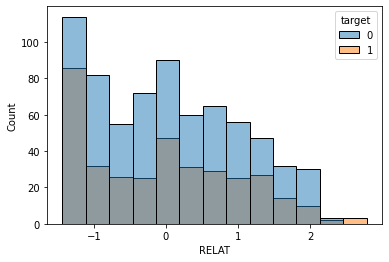

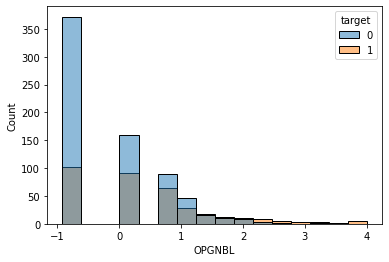

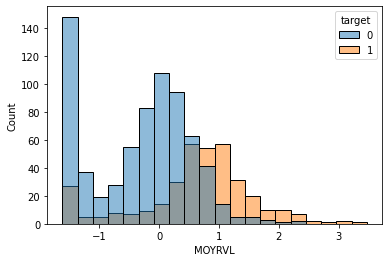

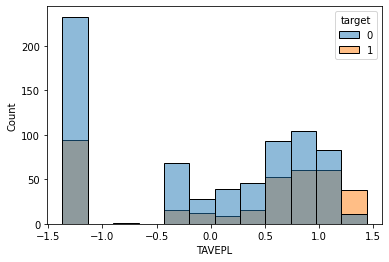

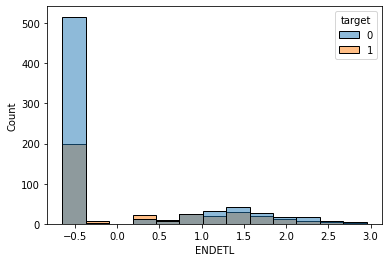

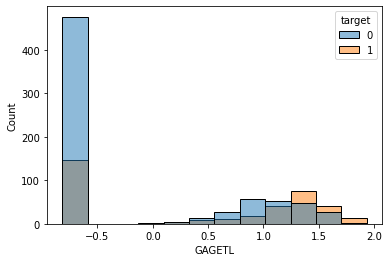

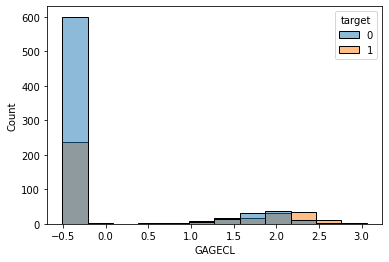

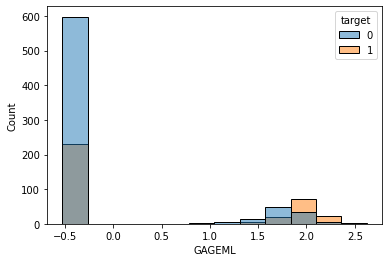

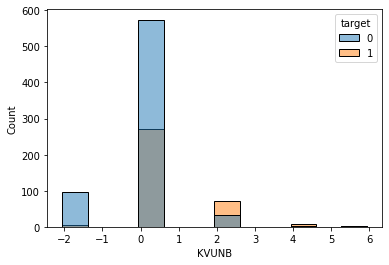

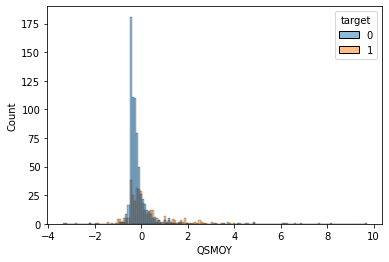

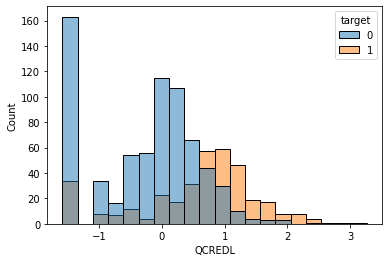

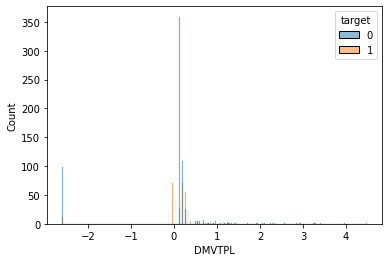

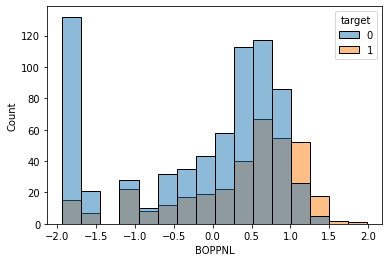

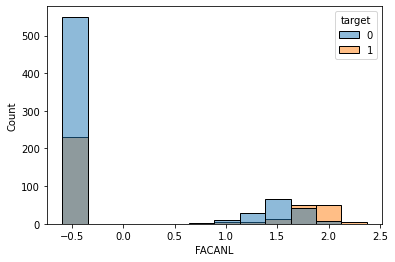

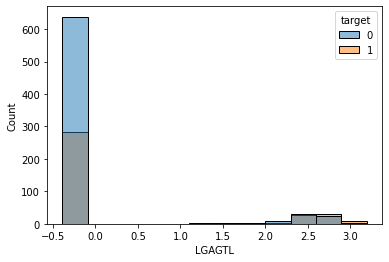

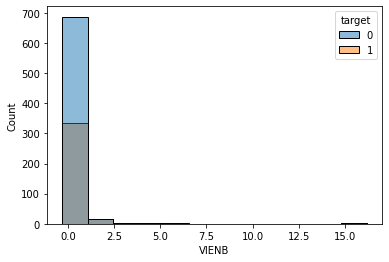

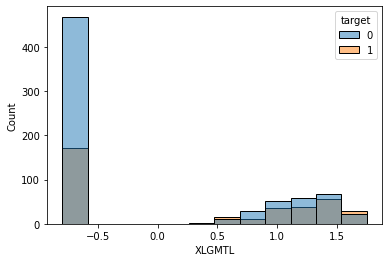

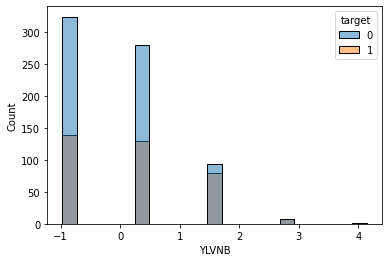

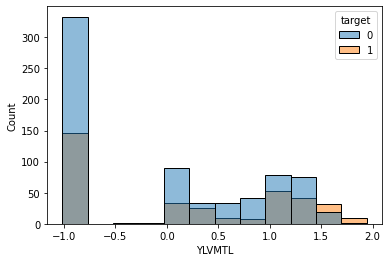

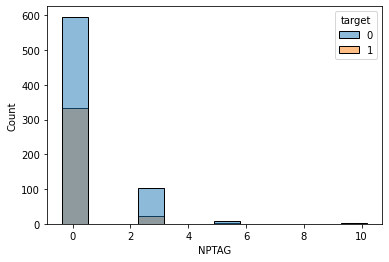

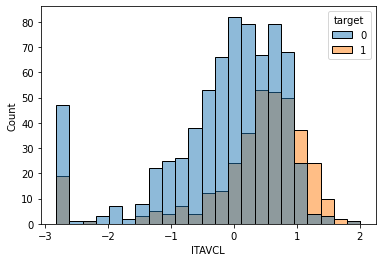

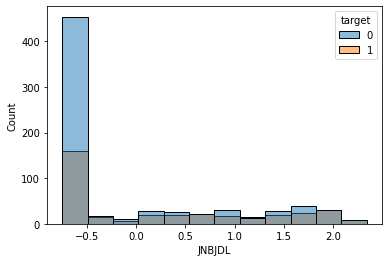

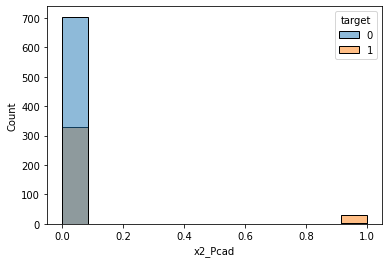

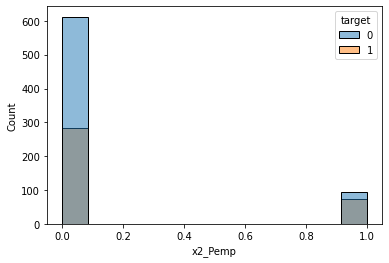

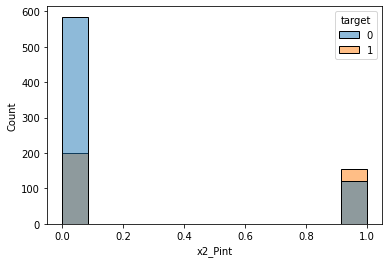

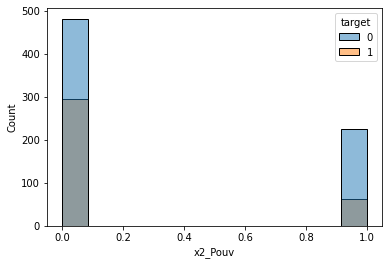

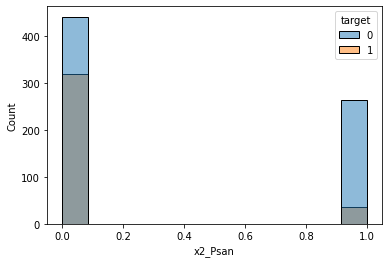

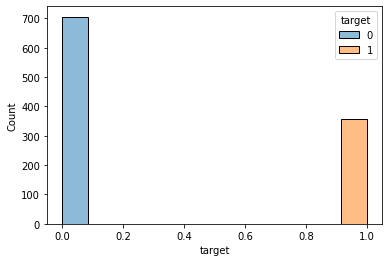

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in data_transformed : 
  plt.figure()
  sns.histplot(data_transformed, x = data_transformed[col], hue="target")

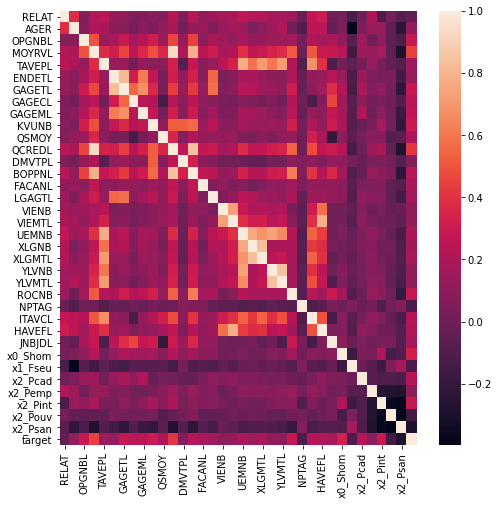

In [ ]:
# Compute the correlation matrix
corr = data_transformed.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,ax=ax)

# **ACP et Régression Logisitique**

In [ ]:
#Execution de l'ACP
from sklearn.decomposition import PCA
data_transformed_X = data_transformed.drop(['target'], axis = 1)
model = PCA(n_components=25)
X = model.fit_transform(data_transformed_X)
print("Variance expliquee:",sum(model.explained_variance_ratio_))

Variance expliquee: 0.9696997339218788


Text(0, 0.5, 'cumulative explained variance')

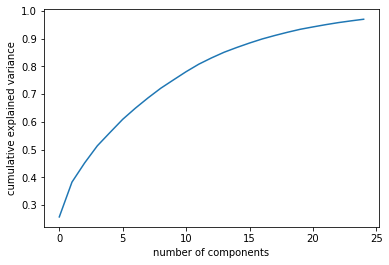

In [ ]:
#print(model.explained_variance_ratio_)
plt.plot(np.cumsum(model.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance')
#On voit que la courbe a un comportement asymptotique, on se pose la question d'aller vers la régression logsitique

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score

#LogisticReg avec PCA
y = data_transformed.target
# X = data_transformed avec PCA 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
logreg = LogisticRegressionCV(cv = 10)
#logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#logreg.predict(X_test)
print(logreg.score(X_train,y_train))
y_chapeau = logreg.predict(X_test)
table=pd.crosstab(y_chapeau,y_test)
print(table)
f1_Logit_yc_PCA = f1_score(y_test, y_chapeau, zero_division=1)
print("f1 score",f1_Logit_yc_PCA)
#F1 score est la métrique de comparaison pour les modèles suivants 
#F1 à 0.76 : peut mieux faire

0.8305439330543933
target   0   1
row_0         
0       60  11
1        7  29
f1 score 0.7631578947368423


In [ ]:
#Réalisation de la ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score
#logreg.fit(X_train, y_train)
y_score_reg = logreg.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score_reg)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score_reg))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#Source : https://www.dezyre.com/recipes/plot-roc-curve-in-python

roc_auc_score for Logistic Regression:  0.8764925373134329


In [ ]:
#LogisticReg sans PCA
X_train, X_test, y_train, y_test = train_test_split(data_transformed_X, y, test_size=0.1, random_state=42)
logreg = LogisticRegressionCV(cv = 10,random_state=0)
#logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_chapeau = logreg.predict(X_test)
table=pd.crosstab(y_chapeau,y_test)
print(table)
print(logreg.score(X_train,y_train))
f1_Logit_no_PCA = f1_score(y_test, y_chapeau, zero_division=1)
print("f1 score sans PCA:",f1_Logit_no_PCA)
print("f1 score yc PCA:",f1_Logit_yc_PCA)
#Le F1 score est sensiblement plus faible sans la PCA

target   0   1
row_0         
0       61  12
1        6  28
0.858786610878661
f1 score sans PCA: 0.7567567567567567
f1 score yc PCA: 0.7631578947368423


# **GBoost et XGBoost**

In [ ]:
#GradientBoostingClassifier sans PCA

from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(data_transformed_X, y, test_size=0.1, random_state=42)

GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
GBC_predict = GBC.predict(X_test)
print(GBC.score(X_train,y_train))
f1_GBoost_no_PCA = f1_score(y_test, GBC_predict, zero_division=1)
print("f1 score Gboost no PCA:",f1_GBoost_no_PCA)

0.9707112970711297
f1 score Gboost no PCA: 0.8831168831168831


In [ ]:
#GradientBoostingClassifier AVEC PCA

from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

GBC = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
GBC_predict = GBC.predict(X_test)
print(GBC.score(X_train,y_train))
f1_GBoost_yc_PCA = f1_score(y_test, GBC_predict, zero_division=1)
print("f1 score Gboost yc PCA:",f1_GBoost_yc_PCA)

1.0
f1 score Gboost yc PCA: 0.7397260273972603


In [ ]:
#XGBOOST 

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix


def get_xgb_imp(xgb, feat_names):
    imp_vals = xgb.get_booster().get_fscore()
    feats_imp = pd.DataFrame(imp_vals,index=np.arange(2)).T
    feats_imp.iloc[:,0]= feats_imp.index    
    feats_imp.columns=['feature','importance']
    feats_imp.sort_values('importance',inplace=True,ascending=False)
    feats_imp.reset_index(drop=True,inplace=True)
    return feats_imp


feat_names = data_transformed_X.columns

xgbc = XGBClassifier(n_estimators=100)

xgbc.fit(X_train, y_train)

# - cross validataion
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
print(scores)


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(xgbc, X_test, y_test, cv=10)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

f1_XGBOOST = f1_score(y_test, y_pred, zero_division=1)
print("f1 score XGBOOST:",f1_XGBOOST)


Mean cross-validation score: 0.81
[0.79166667 0.82198953 0.83246073 0.79057592 0.80104712]
[[57 10]
 [21 19]]
f1 score XGBOOST: 0.5507246376811594


# **Decision Tree**

roc_auc_score for DecisionTree:  0.698134328358209
Score f1 DTree: 0.6478873239436619


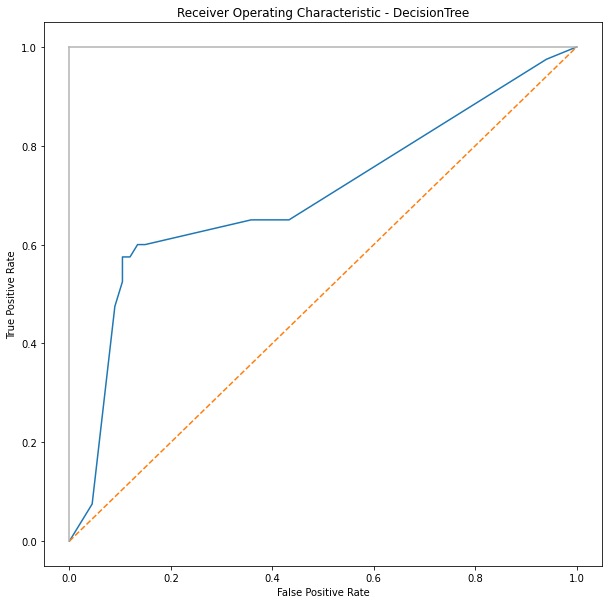

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_leaf_nodes=15);
clf_tree.fit(X_train,y_train)
y_score1 = clf_tree.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
Tree_predict = clf_tree.predict(X_test)
f1_DTree = f1_score(y_test, Tree_predict, zero_division=1)
print("Score f1 DTree:",f1_DTree)
plt.subplots(1, figsize=(10,10)) 
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1) 
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7") 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')
plt.show()

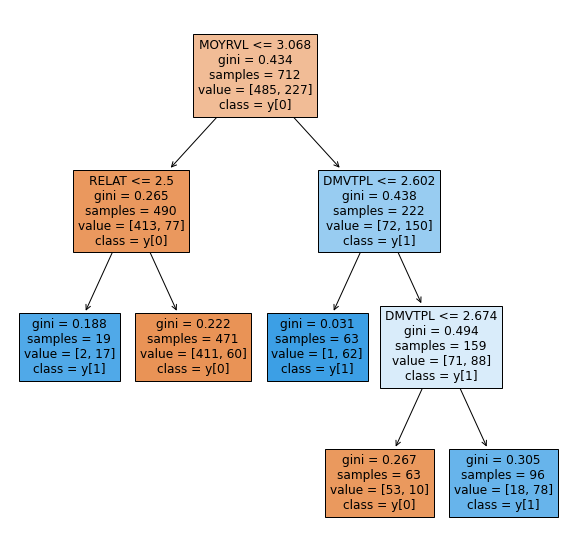

In [ ]:
 from sklearn import tree

#data_transformed_X.shape
#fig = plt.figure(figsize=(10,10))
#_ = tree.plot_tree(clf_tree, 
#                   feature_names=data_transformed_X.columns,
#                   class_names=True,
#                   filled = True)

#Conversion des données numériques
numeric_features = data.select_dtypes(np.number).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

#Conversion des données catégorielles
categorical_features = ['SEXEQ','FAMIQ','PCSPQ']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#pd.DataFrame(preprocessor.fit_transform(data))
preprocessor.fit_transform(data)
enc_cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names()
labels = np.concatenate([numeric_features, enc_cat_features])

transformed_df_columns = pd.DataFrame(preprocessor.transform(data), columns=labels).columns
#print(transformed_df_columns)
data_transformed = pd.DataFrame(preprocessor.transform(data),columns=labels)
#enc_cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names()
data_transformed


X_train, X_test, y_train, y_test = train_test_split(data_transformed, y, test_size=0.33, random_state=42)

clf_tree = DecisionTreeClassifier(max_leaf_nodes=5);
clf_tree.fit(X_train,y_train)

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf_tree, 
                   feature_names=data_transformed_X.columns,
                   class_names=True,
                   filled = True)

In [ ]:
#Analyse de l'arbre
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data_filter = data[data['MOYRVL'] > 3.068]
data_filter.groupby(by=["DMVTPL","CARVP"]).size()

DMVTPL    CARVP
0.000000  Cnon      1
          Coui      2
2.397895  Coui     14
2.484907  Coui     49
2.564949  Coui     31
2.639057  Cnon     83
          Coui     19
2.708050  Cnon     24
          Coui     59
2.772589  Cnon      2
          Coui     40
2.833213  Coui     17
2.944439  Coui      3
2.995732  Coui      1
3.044522  Coui      2
3.091042  Coui      2
3.258097  Coui      1
3.713572  Coui      1
dtype: int64

# **Random Forest**

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

f1_Random = f1_score(y_test, y_pred)
print ("F1 score Random Forest:",f1_Random)
#Source : https://www.datacamp.com/community/tutorials/random-forests-classifier-python
#Source :https://www.kaggle.com/krohitm/f1-score-of-97-using-random-forest


Accuracy: 0.8746438746438746
F1 score Random Forest: 0.8211382113821138


In [ ]:
#Ordre d'importance des variables
Y = np.array(y)
X = np.array(data_transformed_X)
#X = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.20)
clf = clf.fit(X_train, Y_train.ravel())

cols = data_transformed_X.columns
feature_importance_all = clf.feature_importances_
feature_importance = {}
for i in  range(len(cols)):
    feature_importance[cols[i]] = feature_importance_all[i]

feature_import =  pd.DataFrame.from_dict(feature_importance, 
                                         orient = 'index')
print(feature_import.sort_values(by=0, ascending = False))

                0
MOYRVL   0.120168
DMVTPL   0.091022
QCREDL   0.085040
FACANL   0.070631
RELAT    0.065093
QSMOY    0.051568
ITAVCL   0.043868
BOPPNL   0.038076
AGER     0.033842
GAGETL   0.032406
GAGEML   0.032364
GAGECL   0.026046
x0_Shom  0.025334
TAVEPL   0.025197
ROCNB    0.024363
KVUNB    0.021951
JNBJDL   0.020949
OPGNBL   0.020687
x2_Pint  0.018509
YLVMTL   0.018320
XLGMTL   0.018317
HAVEFL   0.018054
ENDETL   0.014510
x2_Psan  0.011497
UEMNB    0.010046
x2_Pcad  0.008466
YLVNB    0.007913
x2_Pouv  0.007556
LGAGTL   0.007284
VIEMTL   0.007162
XLGNB    0.006513
x2_Pemp  0.006165
x1_Fseu  0.005788
VIENB    0.003099
NPTAG    0.002197


# **Comparaison des F1 Scores**

In [ ]:
print("F1 score Random Forest:",f1_Random)
print("F1 Score DTree:",f1_DTree)
print("f1 score XGBOOST:",f1_XGBOOST)
print("f1 score Gboost yc PCA:",f1_GBoost_yc_PCA)
print("f1 score Gboost no PCA:",f1_GBoost_no_PCA)
print("f1 score Logit sans PCA:",f1_Logit_no_PCA)
print("f1 score Logit yc PCA:",f1_Logit_yc_PCA)

F1 score Random Forest: 0.8211382113821138
F1 Score DTree: 0.6478873239436619
f1 score XGBOOST: 0.5507246376811594
f1 score Gboost yc PCA: 0.7397260273972603
f1 score Gboost no PCA: 0.8831168831168831
f1 score Logit sans PCA: 0.7567567567567567
f1 score Logit yc PCA: 0.7631578947368423
